<a href="https://colab.research.google.com/github/DavidAlzateOcampo/DataScienceNetwork/blob/master/Exploring_RF_classifier_attrition_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#@title Install the facets_overview pip package.
!pip install facets-overview

In [0]:
# Load the libraries needed 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
# Set random seed
np.random.seed(0)

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Datasets/Attrition/attrition_kaggle.csv')

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:

# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = df.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

In [0]:
# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'attrition', 'table': df}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [7]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [8]:
# Empty list to store columns with categorical data
categorical = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
        
# Store the numerical columns in a list numerical
numerical = df.columns.difference(categorical)

# Store the categorical data in a dataframe called attrition_cat
df_cat = df[categorical]
df_cat = df_cat.drop(['Attrition'], axis=1) # Dropping the target column

df_cat = pd.get_dummies(df_cat)

df_num = df[numerical]
# Concat the two dataframes together columnwise
df_final = []
df_final = pd.concat([df_num, df_cat], axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [9]:

X=df_final
y=df['Attrition'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
338,30,570,5,3,1,456,4,30,2,2,3,6118,5431,1,13,3,3,80,3,10,2,3,10,9,1,2,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
363,33,350,5,3,1,485,4,34,3,1,3,2851,9150,1,13,3,2,80,0,1,2,3,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
759,45,788,24,4,1,1049,2,36,3,1,2,2177,8318,1,16,3,1,80,0,6,3,3,6,3,0,4,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0
793,28,895,15,2,1,1102,1,50,3,1,3,2207,22482,1,16,3,4,80,1,4,5,2,4,2,2,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
581,30,921,1,3,1,806,4,38,1,1,3,3833,24375,3,21,4,3,80,2,7,2,3,2,2,0,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [0]:
import numpy as np
x = np.arange(300)
y = np.zeros(300)

for j in x:
    predRF_V = RandomForestClassifier(n_estimators=j+1)
    #Train the model using the training sets y_pred = clf.predict(X_test)
    predRF_V.fit(X_train,y_train)
    y_pred=predRF_V.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    x[j] = x[j]+1
    y[j] = metrics.accuracy_score(y_test, y_pred)
    #print("Accuracy ", y[j] , " for ", x[j]," trees")

#plt.plot(x,y)


In [13]:
print('Maximun accuracy  : ', np.amax(y), " with number of trees ",  x[np.where(y == np.amax(y))[0]])

Maximun accuracy  :  0.8798185941043084  with number of trees  [170]


In [0]:
y2 = np.zeros(300)

for j in x:
    predRF_V2 = RandomForestClassifier(n_estimators=j+1,criterion='entropy')
    predRF_V2.fit(X_train,y_train)
    y_pred=predRF_V2.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    y2[j-1] = metrics.accuracy_score(y_test, y_pred)

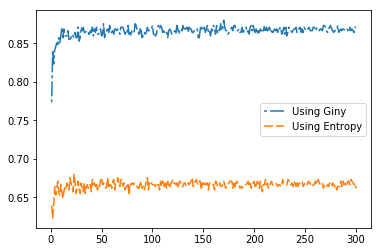

In [17]:
fig, ax = plt.subplots()

line1, = ax.plot(x, y, label='Using Giny')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2 - 0.2, dashes=[6, 2], label='Using Entropy')

ax.legend()
plt.show()

In [0]:
y3 = np.zeros(300)

for j in x:
    predRF_V3 = RandomForestClassifier(n_estimators=j+1,bootstrap=True)
    predRF_V3.fit(X_train,y_train)
    y_pred=predRF_V3.predict(X_test)
    y3[j-1] = metrics.accuracy_score(y_test, y_pred)


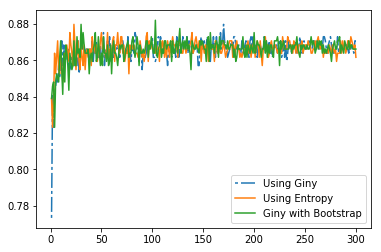

In [26]:
fig, ax = plt.subplots()

line1, = ax.plot(x, y, label='Using Giny')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line2, = ax.plot(x, y2,  label='Using Entropy')
line3, = ax.plot(x, y3, label='Giny with Bootstrap')

ax.legend()
plt.show()

In [0]:

y4 = np.zeros(300)

for j in x:
    predRF_V4 = RandomForestClassifier(n_estimators=j+1,max_depth=4)
    predRF_V4.fit(X_train,y_train)
    y_pred=predRF_V4.predict(X_test)
    y4[j-1] = metrics.accuracy_score(y_test, y_pred)


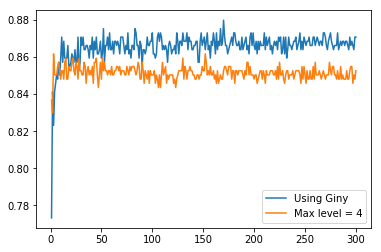

In [29]:
fig, ax = plt.subplots()

line1, = ax.plot(x, y, label='Using Giny')
line2, = ax.plot(x, y4, label='Max level = 4')

ax.legend()
plt.show()